In [96]:
# 忽略warning的输出
import warnings
warnings.filterwarnings('ignore')

In [1]:
from sklearn.datasets import fetch_openml
# mnist = fetch_mldata('MNIST original') 报网络服务的错误
mnist = fetch_openml('mnist_784', version=1, cache=True)
mnist

/anaconda3/lib/python3.7/site-packages/sklearn/datasets/openml.py:58: RuntimeWarning: Invalid cache, redownloading file
  RuntimeWarning)


{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixel49',
  'pixel50',
  'pixel51',
  '

In [97]:
X, y = mnist['data'], mnist['target']
X.shape

(70000, 784)

In [98]:
y.shape

(70000,)

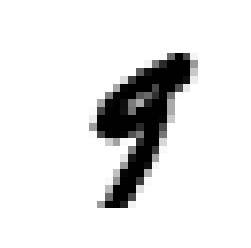

In [99]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

some_digit = X[36000]
some_digit_image = some_digit.reshape(28,28)
plt.imshow(some_digit_image, cmap= matplotlib.cm.binary,
          interpolation='nearest')
plt.axis('off')
plt.show()

In [100]:
y[36000]

'9'

In [101]:
# 划分训练集和测试集
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [102]:
# 打乱训练集
import numpy as np

shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

# 训练一个二分类器

In [103]:
y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')
y_test_5

array([False, False, False, ..., False,  True, False])

In [104]:
y_train

array(['5', '2', '9', ..., '8', '7', '8'], dtype=object)

In [105]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [106]:
sgd_clf.predict([some_digit])

array([False])

# 性能度量

# 交叉验证

In [107]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = (y_train_5[train_index])
    X_test_fold = X_train[test_index]
    y_test_fold = (y_train_5[test_index])
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_corredt = sum(y_pred==y_test_fold)
    print(n_corredt / len(y_test_fold))

0.9691
0.96505
0.97045


In [108]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.9691 , 0.96505, 0.97045])

In [109]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self,X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.91115, 0.909  , 0.9088 ])

## 混淆矩阵

In [110]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [111]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[53724,   855],
       [ 1053,  4368]])

## 准确率与召回率

In [112]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred)

0.8363009764503159

In [113]:
recall_score(y_train_5, y_train_pred)

0.8057553956834532

In [114]:
# f1
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.8207440811724915

In [115]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([-259830.86884605])

In [142]:
threshold = -300000
y_some_digit_pred = (y_scores>threshold)

In [143]:
y_some_digit_pred

array([ True])

In [118]:
threshold = 200000
y_some_digit_pred = (y_scores>threshold)
y_some_digit_pred

array([False])

In [119]:
y_socres = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                            method='decision_function')


In [120]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds, = precision_recall_curve(y_train_5, y_socres)

In [121]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label='Precision')
    plt.plot(thresholds, recalls[:-1], 'g-', label='Recall')
    plt.xlabel('Threshold')
    plt.legend(loc='upper left')
    plt.ylim([0,1])

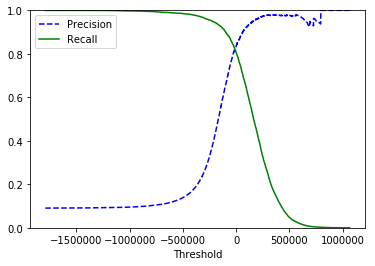

In [122]:
plot_precision_recall_vs_threshold(precisions, recalls,thresholds)
plt.show()

## ROC曲线

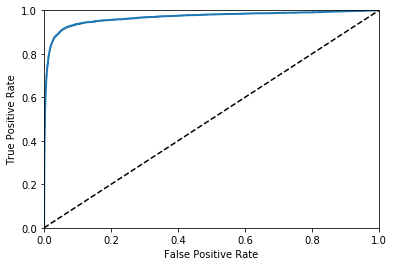

In [123]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_socres)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1],[0,1], 'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
plot_roc_curve(fpr, tpr)
plt.show()

In [124]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_socres)

0.9674092571665242

In [125]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                   method='predict_proba')

In [126]:
y_scores_forest = y_probas_forest[:,1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

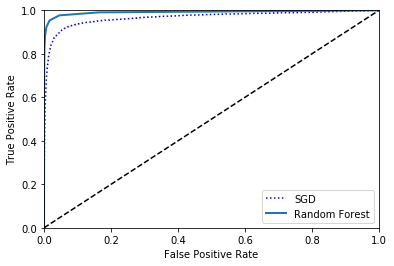

In [127]:
plt.plot(fpr, tpr, 'b:', label='SGD')
plot_roc_curve(fpr_forest, tpr_forest, 'Random Forest')
plt.legend(loc='lower right')
plt.show()

In [128]:
roc_auc_score(y_train_5, y_scores_forest)

0.9916768089488089

# 多分类

In [129]:
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array(['9'], dtype='<U1')

In [130]:
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[-838233.15872975, -391292.01319287, -631118.20031513,
        -222242.5292884 , -113839.87586418, -259830.86884605,
        -754505.79164137, -242148.45724706, -328735.99408412,
         -90722.02598826]])

In [131]:
np.argmax(some_digit_scores)

9

In [132]:
sgd_clf.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype='<U1')

In [133]:
sgd_clf.classes_[5]

'5'

In [134]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(X_train, y_train)
ovo_clf.predict([some_digit])

array(['4'], dtype=object)

In [135]:
len(ovo_clf.estimators_)

45

In [136]:
forest_clf.fit(X_train, y_train)
forest_clf.predict([some_digit])

array(['9'], dtype=object)

In [137]:
forest_clf.predict_proba([some_digit])

array([[0. , 0. , 0. , 0. , 0.1, 0.1, 0. , 0. , 0. , 0.8]])

In [138]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring='accuracy')

array([0.87812438, 0.86519326, 0.8359754 ])

In [139]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring='accuracy')

array([0.90821836, 0.90774539, 0.91338701])

# 误差分析

In [140]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5728,    3,   23,    9,   11,   48,   47,   10,   40,    4],
       [   2, 6492,   47,   26,    6,   43,   10,   11,   94,   11],
       [  57,   36, 5337,  100,   81,   21,  101,   60,  149,   16],
       [  50,   34,  144, 5332,    2,  235,   38,   55,  140,  101],
       [  20,   27,   34,    9, 5364,   10,   59,   29,   96,  194],
       [  75,   39,   31,  178,   71, 4606,  100,   29,  188,  104],
       [  29,   26,   39,    3,   44,   92, 5636,    5,   44,    0],
       [  23,   20,   69,   29,   54,   10,    7, 5808,   16,  229],
       [  50,  156,   77,  147,   17,  150,   60,   27, 5032,  135],
       [  46,   32,   25,   92,  167,   37,    2,  217,   79, 5252]])

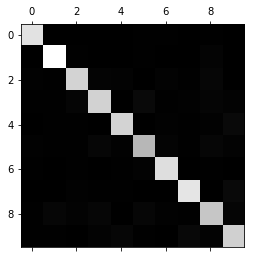

In [70]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [72]:
row_sums = conf_mx.sum(axis=1)
norm_conf_mx = conf_mx / row_sums

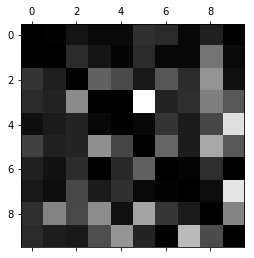

In [73]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

# 多标签分类

In [88]:
from sklearn.neighbors import KNeighborsClassifier

y_train = y_train.astype(int) # 将字符型标签转化为整型
y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

knn_clf.predict([some_digit])

array([[ True,  True]])

In [90]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_train, cv=3)
f1_score(y_train, y_train_knn_pred, average='macro')

0.9671989524961443

# 多输出分类

In [94]:
noise_train = np.random.randint(0, 100, (len(X_train), 784))
noise_test = np.random.randint(0, 100, (len(X_test), 784))
X_train_mod = X_train+noise_train
X_test_mod = X_test + noise_test
y_train_mod = X_train
y_test_mod = X_test

In [141]:
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[some_index]])
plot_digit(clean_digit)